# Results Analysis

## Load Packages

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import glob
import re
import os

from utils.load_training_data import load_training_results
from utils.ba_vs_loss import plot_behavior_vs_loss
from utils.merge_neural_behavioral import merge_behavioral_and_neural
from utils.na_vs_loss import plot_neural_alignment_vs_loss

In [2]:
plt.rcParams['font.family'] = 'Times New Roman'

## Baseline behavioral results

This contains the training loss, test loss, behavioral alignment, and p-value at every epoch.

Read in seeds 1, 2, and 3 baseline training data.

In [3]:
baseline_seed1_ba_results = load_training_results(
    Path("../data/training_results/training_res_seed1.csv"),
    truncate_at_min_test_loss=True,
)


baseline_seed2_ba_results = load_training_results(
    Path("../data/training_results/training_res_seed2.csv"),
    truncate_at_min_test_loss=True,
)


baseline_seed3_ba_results = load_training_results(
    Path("../data/training_results/training_res_seed3.csv"),
    truncate_at_min_test_loss=True,
)

Plot baseline S-curve for all 3 seeds.

<Axes: xlabel='Test Loss', ylabel='Behavioral\nAlignment'>

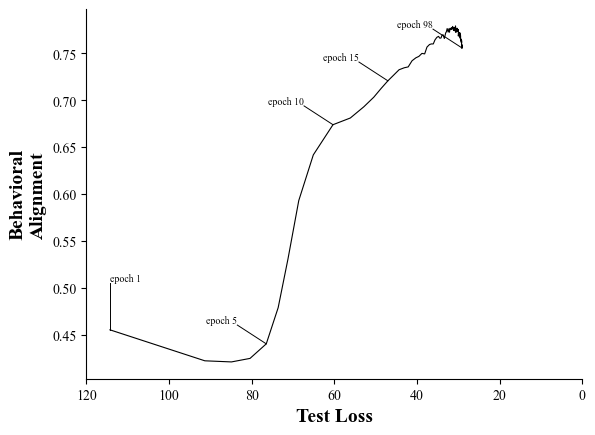

In [4]:
plot_behavior_vs_loss(baseline_seed1_ba_results)

<Axes: xlabel='Test Loss', ylabel='Behavioral\nAlignment'>

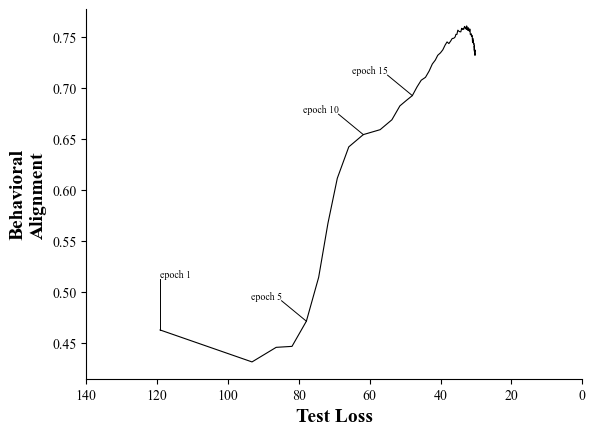

In [5]:
plot_behavior_vs_loss(baseline_seed2_ba_results)

<Axes: xlabel='Test Loss', ylabel='Behavioral\nAlignment'>

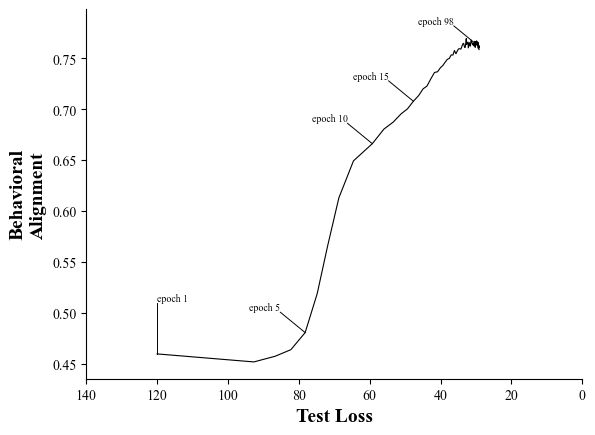

In [6]:
plot_behavior_vs_loss(baseline_seed3_ba_results)

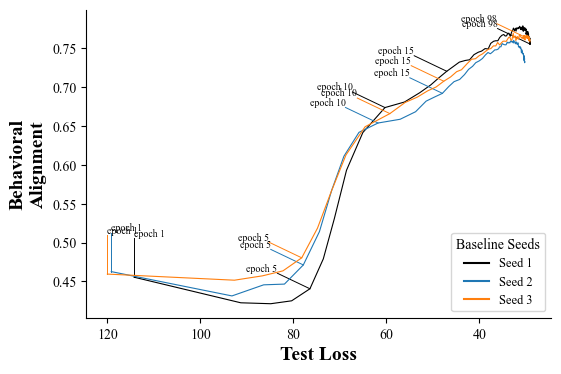

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))

plot_behavior_vs_loss(baseline_seed1_ba_results, ax=ax, line_kwargs={"color": "black"})
plot_behavior_vs_loss(baseline_seed2_ba_results, ax=ax, line_kwargs={"color": "tab:blue"})
plot_behavior_vs_loss(baseline_seed3_ba_results, ax=ax, line_kwargs={"color": "tab:orange"})

# Add legend labeling each seed
ax.plot([], [], color="black", label="Seed 1")
ax.plot([], [], color="tab:blue", label="Seed 2")
ax.plot([], [], color="tab:orange", label="Seed 3")
ax.legend(title="Baseline Seeds", loc="lower right", fontsize=9, title_fontsize=10)

plt.show()


## Baseline neural results

Read in seedss 1, 2, and 3 baseline neural alignment results.

In [8]:
baseline_seed1_na_results = pd.read_csv('../data/brain_rsa_results/baseline_seed1_brain_rsa_results.csv')

baseline_seed2_na_results = pd.read_csv('../data/brain_rsa_results/baseline_seed2_brain_rsa_results.csv')

baseline_seed3_na_results = pd.read_csv('../data/brain_rsa_results/baseline_seed3_brain_rsa_results.csv')

Merge the neural and behavioral alignment ressults.

In [9]:
baseline_seed1_df = merge_behavioral_and_neural(baseline_seed1_ba_results, baseline_seed1_na_results)

baseline_seed2_df = merge_behavioral_and_neural(baseline_seed2_ba_results, baseline_seed2_na_results)

baseline_seed3_df = merge_behavioral_and_neural(baseline_seed3_ba_results, baseline_seed3_na_results)

Plot neural alignment vs. test loss

<Axes: xlabel='Test Loss', ylabel='Neural Alignment'>

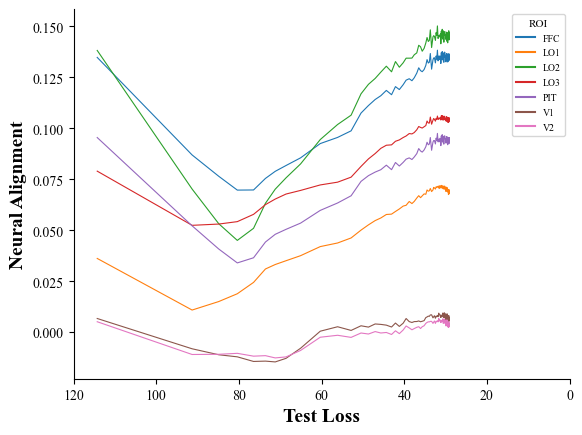

In [10]:
plot_neural_alignment_vs_loss(baseline_seed1_df, plot_rois=['V1', 'V2', 'LO1', 'LO2', 'LO3', 'PIT', 'FFC'])

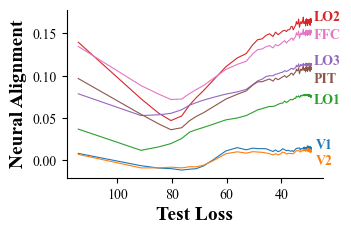

In [ ]:


roi_order = ['V1', 'V2', 'LO1', 'LO2', 'LO3', 'PIT', 'FFC']
roi_text_labels = {'V1', 'V2', 'LO1', 'LO2', 'LO3', 'PIT', 'FFC'}

# For ROIs not to be shown in legend, we'll collect handles and labels separately
handles = []
labels = []

for idx, roi in enumerate(roi_order):
    if roi in baseline_neural_behavioral_merged['roi'].unique():
        roi_df = baseline_neural_behavioral_merged[baseline_neural_behavioral_merged['roi'] == roi]
        # Plot the line for this ROI, but only include in legend if not in roi_text_labels
        if roi in roi_text_labels:
            handle, = plt.plot(roi_df['test_loss'], roi_df['rho'], linestyle='-', linewidth=0.8)
        else:
            handle, = plt.plot(roi_df['test_loss'], roi_df['rho'], linestyle='-', label=roi)
            handles.append(handle)
            labels.append(roi)
        # Only add text labels for selected ROIs
        if roi in roi_text_labels and not roi_df.empty:
            x = roi_df['test_loss'].iloc[-1] - 5
            y = roi_df['rho'].iloc[-1]

            if roi == "V2":
                y = y - 0.016

            elif roi == "LO1":
                y = y - 0.009
                x = x - 1

            elif roi == "PIT":
                y = y - 0.018

            elif roi == "FFC":
                y = y - 0.009
                x = x - 1

            elif roi == "LO2":
                y = y - 0.001
                x = x - 1
            
            elif roi == "LO3":
                x = x - 1

            plt.text(
                x,                     # directly above the last point's epoch
                y,                 # nudge farther downward for clarity
                roi,
                color=handle.get_color(),
                #va=va,                 # position label just above/below the marker
                ha='center',
                fontsize=10,
                fontweight='bold',
                bbox=dict(facecolor='white', edgecolor='none', pad=0.2, alpha=0.7)
            )

plt.xlabel('Test Loss', fontweight='bold', fontsize=14)
plt.ylabel('Neural Alignment', fontweight='bold', fontsize=14)
#plt.title('CLIP-HBA-Behavior Neural Alignment with NOD fMRI Activations', fontweight='bold', fontsize=16)
if handles and labels:
    plt.legend(handles, labels, title='ROI', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()

# Flip the x-axis so that loss goes from high to low
ax = plt.gca()
ax.invert_xaxis()

# Remove the top and right spines (borders)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.gcf().set_size_inches(3, 2)

plt.show()

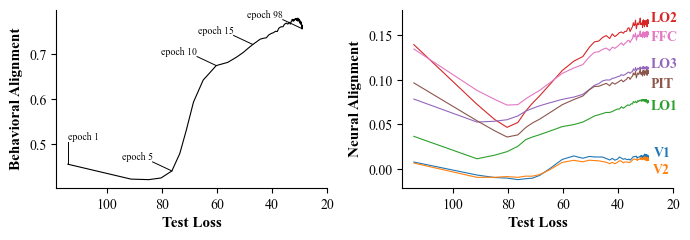

In [ ]:
# Create two subplots: left for behavioral alignment, right for neural alignment

fig, axes = plt.subplots(1, 2, figsize=(7, 2.5), sharex=False)  # Make two subfigures; each axis size 2x1.75

################### Behavioral Alignment Plot (Left subplot) ###################
ax0 = axes[0]
ax = ax0  # for clarity

# Add subplot label "A."
# ax.text(-0.13, 1.07, "A.", transform=ax.transAxes, fontsize=15, fontweight='bold', va='top', ha='left')

ax.plot(baseline_df['test_loss'], baseline_df['behavioral_rsa_rho'], linewidth=.8, color='black')

# Label only epochs 1, 5, 10, and 15 (if they exist)
label_epochs = [1, 5, 10, 15, 98]
for i in range(min(98, len(baseline_df))):
    epoch = baseline_df['epoch'].iloc[i]
    if epoch in label_epochs:
        x = baseline_df['test_loss'].iloc[i]
        y = baseline_df['behavioral_rsa_rho'].iloc[i]
        # Calculate coordinates for the label
        if epoch == 1:
            label_x = x  
            label_y = y + 0.05
            ha = 'left'
        else:
            label_x = x + 7
            label_y = y + 0.02
            ha = 'right'
        ax.text(label_x, label_y, f'epoch {str(epoch)}', fontsize=7, ha=ha, va='bottom')
        ax.plot([x, label_x], [y, label_y], color='black', linewidth=0.7, zorder=2)

# Reverse the x-axis
ax.invert_xaxis()
ax.set_xlabel('Test Loss', fontweight='bold', fontsize=11)
ax.set_ylabel('Behavioral Alignment', fontweight='bold', fontsize=11)

# Remove the top and right spines (borders)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set x-axis ticks to count by 20s (preserve logic from original)
xmin, xmax = ax.get_xlim()
if xmin > xmax:
    xticks = np.arange(int(xmin // 20) * 20, int(xmax // 20) * 20 - 1, -20)
else:
    xticks = np.arange(int(xmin // 20) * 20, int(xmax // 20) * 20 + 1, 20)
ax.set_xticks(xticks)

################### Neural Alignment Plot (Right subplot) ###################
ax1 = axes[1]
ax = ax1  # for clarity

# Add subplot label "B."
# ax.text(-0.13, 1.07, "B.", transform=ax.transAxes, fontsize=15, fontweight='bold', va='top', ha='left')

roi_order = ['V1', 'V2', 'LO1', 'LO2', 'LO3', 'PIT', 'FFC']
roi_text_labels = {'V1', 'V2', 'LO1', 'LO2', 'LO3', 'PIT', 'FFC'}

handles = []
labels = []

for idx, roi in enumerate(roi_order):
    if roi in baseline_neural_behavioral_merged['roi'].unique():
        roi_df = baseline_neural_behavioral_merged[baseline_neural_behavioral_merged['roi'] == roi]
        if roi in roi_text_labels:
            handle, = ax.plot(roi_df['test_loss'], roi_df['rho'], linestyle='-', linewidth=0.8)
        else:
            handle, = ax.plot(roi_df['test_loss'], roi_df['rho'], linestyle='-', label=roi)
            handles.append(handle)
            labels.append(roi)
        # Only add text labels for selected ROIs
        if roi in roi_text_labels and not roi_df.empty:
            x = roi_df['test_loss'].iloc[-1] - 5
            y = roi_df['rho'].iloc[-1]

            if roi == "V2":
                y = y - 0.016
            elif roi == "LO1":
                y = y - 0.009
                x = x - 1
            elif roi == "PIT":
                y = y - 0.018
            elif roi == "FFC":
                y = y - 0.009
                x = x - 1
            elif roi == "LO2":
                y = y - 0.001
                x = x - 1
            elif roi == "LO3":
                x = x - 1

            ax.text(
                x,
                y,
                roi,
                color=handle.get_color(),
                ha='center',
                fontsize=10,
                fontweight='bold',
                bbox=dict(facecolor='white', edgecolor='none', pad=0.2, alpha=0.7)
            )

ax.set_xlabel('Test Loss', fontweight='bold', fontsize=11)
ax.set_ylabel('Neural Alignment', fontweight='bold', fontsize=11)
if handles and labels:
    ax.legend(handles, labels, title='ROI', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=7, title_fontsize=8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.invert_xaxis()

# Match x-tick logic for this subplot too (optional: you can use the same code as above)
xmin, xmax = ax.get_xlim()
if xmin > xmax:
    xticks = np.arange(int(xmin // 20) * 20, int(xmax // 20) * 20 - 1, -20)
else:
    xticks = np.arange(int(xmin // 20) * 20, int(xmax // 20) * 20 + 1, 20)
ax.set_xticks(xticks)

################### Final subplot formatting ###################
plt.tight_layout()
plt.show()

### Single Epoch Perturbation Sweep Baseline seed 1, perturbation seed 42

Load the results from the singel epoch perturbation sweep.

In [ ]:
# Set up paths 
results_dir_seed42 = Path('./Data/checkpoints/noisy_target_checkpoints/single_epoch_perturbation_sweep/perturb_sweep_baselineseed1_perturbseed42')

# Find all training run directories from the single epoch perturbation sweep
run_dirs_seed42 = sorted([d for d in results_dir_seed42.glob('training_run*') if d.is_dir()],
                  key=lambda x: int(x.name.split('run')[1]))

print(f"Found {len(run_dirs_seed42)} training runs:")
for run_dir in run_dirs_seed42:
    print(f"  - {run_dir.name}")

Found 98 training runs:
  - training_run1
  - training_run2
  - training_run3
  - training_run4
  - training_run5
  - training_run6
  - training_run7
  - training_run8
  - training_run9
  - training_run10
  - training_run11
  - training_run12
  - training_run13
  - training_run14
  - training_run15
  - training_run16
  - training_run17
  - training_run18
  - training_run19
  - training_run20
  - training_run21
  - training_run22
  - training_run23
  - training_run24
  - training_run25
  - training_run26
  - training_run27
  - training_run28
  - training_run29
  - training_run30
  - training_run31
  - training_run32
  - training_run33
  - training_run34
  - training_run35
  - training_run36
  - training_run37
  - training_run38
  - training_run39
  - training_run40
  - training_run41
  - training_run42
  - training_run43
  - training_run44
  - training_run45
  - training_run46
  - training_run47
  - training_run48
  - training_run49
  - training_run50
  - training_run51
  - training_run

In [ ]:
# Load data from all training runs
training_run_data_seed42 = {}

for run_dir in run_dirs_seed42:
    run_name = run_dir.name
    run_num = run_name.split('run')[1]
    csv_file = run_dir / f"training_res_run{run_num}.csv"
    
    if csv_file.exists():
        df = pd.read_csv(csv_file)
        
        if len(df) > 0:
            training_run_data_seed42[run_name] = df
            print(f"{run_name}: {len(df)} epochs with valid data")
        else:
            print(f"{run_name}: No valid data found (all NaN)")
    else:
        print(f"{run_name}: CSV file not found")

print(f"\nTotal runs with valid data: {len(training_run_data_seed42)}")


training_run1: 108 epochs with valid data
training_run2: 107 epochs with valid data
training_run3: 94 epochs with valid data
training_run4: 93 epochs with valid data
training_run5: 92 epochs with valid data
training_run6: 91 epochs with valid data
training_run7: 90 epochs with valid data
training_run8: 87 epochs with valid data
training_run9: 86 epochs with valid data
training_run10: 85 epochs with valid data
training_run11: 84 epochs with valid data
training_run12: 83 epochs with valid data
training_run13: 82 epochs with valid data
training_run14: 81 epochs with valid data
training_run15: 80 epochs with valid data
training_run16: 79 epochs with valid data
training_run17: 78 epochs with valid data
training_run18: 77 epochs with valid data
training_run19: 76 epochs with valid data
training_run20: 75 epochs with valid data
training_run21: 74 epochs with valid data
training_run22: 73 epochs with valid data
training_run23: 72 epochs with valid data
training_run24: 71 epochs with valid data

In [ ]:
print(baseline_seed1_df)

    epoch  train_loss   test_loss  behavioral_rsa_rho  behavioral_rsa_p_value
0       0         NaN  159.354300            0.441700            0.000000e+00
1       1  143.198375  114.267337            0.455443            7.497325e-59
2       2   99.003030   91.310430            0.422459            4.797240e-50
3       3   88.155927   84.871568            0.421268            9.572966e-50
4       4   82.863315   80.375895            0.425018            1.076738e-50
..    ...         ...         ...                 ...                     ...
94     94   17.675313   29.133197            0.755533           4.658267e-209
95     95   17.545072   29.212518            0.759054           4.063549e-212
96     96   17.450050   29.148153            0.755926           2.132139e-209
97     97   17.317206   29.184973            0.757532           8.660125e-211
98     98   17.214430   29.101309            0.755587           4.177484e-209

[99 rows x 5 columns]


### To account for the epochs that were recorded before early stopping was triggered, but after the the minimum test loss was reached, remove all the rows of each training run after the minimum test loss of that run.

In [ ]:

all_data_seed42 = {}

for run_name, df in training_run_data_seed42.items():
    if len(df) == 0:
        all_data_seed42[run_name] = df
        continue

    # Find the epoch with minimum test loss
    min_test_loss_idx = df['test_loss'].idxmin()

    # Keep all rows up to and including the minimum test loss epoch
    filtered_df = df.loc[:min_test_loss_idx].copy()

    all_data_seed42[run_name] = filtered_df

    # Print info about the filtering
    original_epochs = len(df)
    filtered_epochs = len(filtered_df)
    removed_epochs = original_epochs - filtered_epochs
    print(f"{run_name}: {original_epochs} -> {filtered_epochs} epochs "
            f"(removed {removed_epochs} epochs after minimum test loss)")

training_run1: 108 -> 98 epochs (removed 10 epochs after minimum test loss)
training_run2: 107 -> 97 epochs (removed 10 epochs after minimum test loss)
training_run3: 94 -> 84 epochs (removed 10 epochs after minimum test loss)
training_run4: 93 -> 83 epochs (removed 10 epochs after minimum test loss)
training_run5: 92 -> 82 epochs (removed 10 epochs after minimum test loss)
training_run6: 91 -> 81 epochs (removed 10 epochs after minimum test loss)
training_run7: 90 -> 80 epochs (removed 10 epochs after minimum test loss)
training_run8: 87 -> 77 epochs (removed 10 epochs after minimum test loss)
training_run9: 86 -> 76 epochs (removed 10 epochs after minimum test loss)
training_run10: 85 -> 75 epochs (removed 10 epochs after minimum test loss)
training_run11: 84 -> 74 epochs (removed 10 epochs after minimum test loss)
training_run12: 83 -> 73 epochs (removed 10 epochs after minimum test loss)
training_run13: 82 -> 72 epochs (removed 10 epochs after minimum test loss)
training_run14: 81 

In [ ]:
# Print summary statistics for all runs
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60 + "\n")

# Print baseline statistics first
if baseline_seed1_df is not None:
    baseline_sorted = baseline_seed1_df.sort_values('epoch')
    print("BASELINE (No Perturbations):")
    print(f"  Epochs: {baseline_seed1_df['epoch'].min():.0f} - {baseline_seed1_df['epoch'].max():.0f} ({len(baseline_seed1_df)} total)")
    print(f"  Validation Loss:")
    print(f"    Range: {baseline_seed1_df['test_loss'].min():.2f} - {baseline_seed1_df['test_loss'].max():.2f}")
    print(f"    Initial: {baseline_sorted.iloc[0]['test_loss']:.2f}")
    print(f"    Final: {baseline_sorted.iloc[-1]['test_loss']:.2f}")
    print(f"  Behavioral Alignment:")
    print(f"    Range: {baseline_seed1_df['behavioral_rsa_rho'].min():.4f} - {baseline_seed1_df['behavioral_rsa_rho'].max():.4f}")
    print(f"    Initial: {baseline_sorted.iloc[0]['behavioral_rsa_rho']:.4f}")
    print(f"    Final: {baseline_sorted.iloc[-1]['behavioral_rsa_rho']:.4f}")
    print(f"    Change: {(baseline_sorted.iloc[-1]['behavioral_rsa_rho'] - baseline_sorted.iloc[0]['behavioral_rsa_rho']):.4f}")
    print("\n" + "-"*60 + "\n")

for run_name, df in all_data_seed42.items():
    run_num = run_name.split('run')[1]
    df_sorted = df.sort_values('epoch')
    
    print(f"Training Run {run_num} (Perturbed at epoch {run_num}):")
    print(f"  Epochs: {df['epoch'].min():.0f} - {df['epoch'].max():.0f} ({len(df)} total)")
    print(f"  Validation Loss:")
    print(f"    Range: {df['test_loss'].min():.2f} - {df['test_loss'].max():.2f}")
    print(f"    Final: {df_sorted.iloc[-1]['test_loss']:.2f}")
    print(f"  Behavioral Alignment:")
    print(f"    Range: {df['behavioral_rsa_rho'].min():.4f} - {df['behavioral_rsa_rho'].max():.4f}")
    print(f"    Initial: {df_sorted.iloc[0]['behavioral_rsa_rho']:.4f}")
    print(f"    Final: {df_sorted.iloc[-1]['behavioral_rsa_rho']:.4f}")
    print(f"    Change: {(df_sorted.iloc[-1]['behavioral_rsa_rho'] - df_sorted.iloc[0]['behavioral_rsa_rho']):.4f}")
    
    # Compare to baseline at same epoch if available
    if baseline_seed1_df is not None:
        perturb_epoch = int(run_num)
        baseline_at_perturb = baseline_seed1_df[baseline_seed1_df['epoch'] == perturb_epoch]
        if len(baseline_at_perturb) > 0:
            baseline_ba = baseline_at_perturb.iloc[0]['behavioral_rsa_rho']
            final_ba = df_sorted.iloc[-1]['behavioral_rsa_rho']
            print(f"  Comparison to baseline at perturbation epoch {perturb_epoch}:")
            print(f"    Baseline BA: {baseline_ba:.4f}")
            print(f"    Final BA after recovery: {final_ba:.4f}")
            print(f"    Difference: {(final_ba - baseline_ba):.4f}")
    print()



SUMMARY STATISTICS

BASELINE (No Perturbations):
  Epochs: 0 - 98 (99 total)
  Validation Loss:
    Range: 29.10 - 159.35
    Initial: 159.35
    Final: 29.10
  Behavioral Alignment:
    Range: 0.4213 - 0.7790
    Initial: 0.4417
    Final: 0.7556
    Change: 0.3139

------------------------------------------------------------

Training Run 1 (Perturbed at epoch 1):
  Epochs: 1 - 98 (98 total)
  Validation Loss:
    Range: 29.10 - 119.47
    Final: 29.10
  Behavioral Alignment:
    Range: 0.4246 - 0.7853
    Initial: 0.4383
    Final: 0.7674
    Change: 0.3291
  Comparison to baseline at perturbation epoch 1:
    Baseline BA: 0.4554
    Final BA after recovery: 0.7674
    Difference: 0.3120

Training Run 2 (Perturbed at epoch 2):
  Epochs: 2 - 98 (97 total)
  Validation Loss:
    Range: 29.17 - 94.16
    Final: 29.17
  Behavioral Alignment:
    Range: 0.4122 - 0.7796
    Initial: 0.4471
    Final: 0.7532
    Change: 0.3061
  Comparison to baseline at perturbation epoch 2:
    Baseline

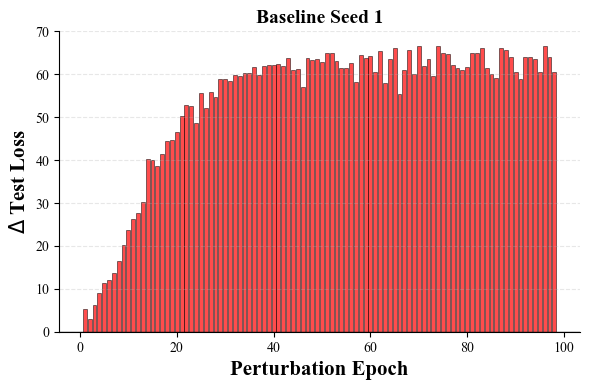


Test loss deviation at perturbation epoch statistics:
  Overall minimum: 2.85
  Overall maximum: 66.68
  Mean: 53.91
  Standard deviation: 16.39
  Range: 63.83

Deviation breakdown:
  Positive deviations (higher loss): 98
  Negative deviations (lower loss): 0
  Zero deviations (same loss): 0

Deviation examples:
  Run 1: +5.20 deviation
  Run 2: +2.85 deviation
  Run 3: +6.33 deviation
  Run 4: +9.14 deviation
  Run 5: +11.36 deviation


In [ ]:
# Plot test loss deviation at perturbation epoch compared to baseline
perturbation_deviations = []
run_numbers_deviation = []

for run_name, df in all_data_seed42.items():
    run_num = int(run_name.split('run')[1])
    
    perturb_epoch = int(run_num)
    
    # Get test loss at perturbation epoch for this run
    run_at_perturb = df[df['epoch'] == perturb_epoch]
    
    # Get baseline test loss at the same epoch
    baseline_at_perturb = baseline_seed1_df[baseline_seed1_df['epoch'] == perturb_epoch]
    
    if len(run_at_perturb) > 0 and len(baseline_at_perturb) > 0:
        run_loss = run_at_perturb.iloc[0]['test_loss']
        baseline_loss = baseline_at_perturb.iloc[0]['test_loss']
        
        # Calculate deviation (run - baseline)
        deviation = run_loss - baseline_loss
        perturbation_deviations.append(deviation)
        run_numbers_deviation.append(run_num)

# Sort by run number for proper ordering
sorted_data_deviation = sorted(zip(run_numbers_deviation, perturbation_deviations))
run_numbers_deviation_sorted, perturbation_deviations_sorted = zip(*sorted_data_deviation)

# Create the bar plot
fig, ax = plt.subplots(figsize=(6, 4))
colors = ['red' if dev > 0 else 'green' for dev in perturbation_deviations_sorted]
ax.bar(run_numbers_deviation_sorted, perturbation_deviations_sorted, alpha=0.7, color=colors, edgecolor='black', linewidth=0.5)
ax.set_xlabel('Perturbation Epoch', fontsize=15, fontweight='bold')
ax.set_ylabel('$\Delta$ Test Loss', fontsize=15, fontweight='bold')
ax.set_title('Baseline Seed 1', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--', axis='y')

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add zero line
ax.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=1)

# Add some statistics
min_deviation_overall = min(perturbation_deviations_sorted)
max_deviation_overall = max(perturbation_deviations_sorted)
mean_deviation = np.mean(perturbation_deviations_sorted)

plt.tight_layout()
plt.show()

print(f"\nTest loss deviation at perturbation epoch statistics:")
print(f"  Overall minimum: {min_deviation_overall:.2f}")
print(f"  Overall maximum: {max_deviation_overall:.2f}")
print(f"  Mean: {mean_deviation:.2f}")
print(f"  Standard deviation: {np.std(perturbation_deviations_sorted):.2f}")
print(f"  Range: {max_deviation_overall - min_deviation_overall:.2f}")

# Count positive vs negative deviations
positive_deviations = sum(1 for dev in perturbation_deviations_sorted if dev > 0)
negative_deviations = sum(1 for dev in perturbation_deviations_sorted if dev < 0)
zero_deviations = sum(1 for dev in perturbation_deviations_sorted if dev == 0)

print(f"\nDeviation breakdown:")
print(f"  Positive deviations (higher loss): {positive_deviations}")
print(f"  Negative deviations (lower loss): {negative_deviations}")
print(f"  Zero deviations (same loss): {zero_deviations}")

# Print some examples for verification
print(f"\nDeviation examples:")
for i in range(min(5, len(run_numbers_deviation_sorted))):
    run_num = run_numbers_deviation_sorted[i]
    deviation = perturbation_deviations_sorted[i]
    print(f"  Run {run_num}: {deviation:+.2f} deviation")


Show how behavioral alignment changes at the epoch the model is perturbed.

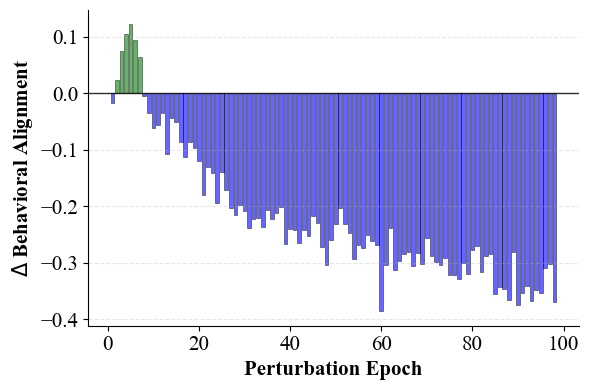


Behavioral alignment deviation at perturbation epoch statistics:
  Overall minimum: -0.3861
  Overall maximum: 0.1224
  Mean: -0.2199
  Standard deviation: 0.1179
  Range: 0.5084

Deviation breakdown:
  Positive deviations (higher alignment): 6
  Negative deviations (lower alignment): 92
  Zero deviations (same alignment): 0

Deviation examples:
  Run 1: -0.0171 deviation
  Run 2: +0.0246 deviation
  Run 3: +0.0760 deviation
  Run 4: +0.1051 deviation
  Run 5: +0.1224 deviation


In [ ]:
# Plot behavioral alignment deviation at perturbation epoch compared to baseline
perturbation_deviations_ba = []
run_numbers_deviation_ba = []

for run_name, df in all_data_seed42.items():
    run_num = int(run_name.split('run')[1])
    
    perturb_epoch = int(run_num)
    
    # Get behavioral alignment at perturbation epoch for this run
    run_at_perturb = df[df['epoch'] == perturb_epoch]
    
    # Get baseline behavioral alignment at the same epoch
    baseline_at_perturb = baseline_seed1_df[baseline_seed1_df['epoch'] == perturb_epoch]
    
    if len(run_at_perturb) > 0 and len(baseline_at_perturb) > 0:
        run_ba = run_at_perturb.iloc[0]['behavioral_rsa_rho']
        baseline_ba = baseline_at_perturb.iloc[0]['behavioral_rsa_rho']
        
        # Calculate deviation (run - baseline)
        deviation = run_ba - baseline_ba
        perturbation_deviations_ba.append(deviation)
        run_numbers_deviation_ba.append(run_num)

# Sort by run number for proper ordering
sorted_data_deviation_ba = sorted(zip(run_numbers_deviation_ba, perturbation_deviations_ba))
run_numbers_deviation_ba_sorted, perturbation_deviations_ba_sorted = zip(*sorted_data_deviation_ba)

# Create the bar plot
fig, ax = plt.subplots(figsize=(6, 4))
colors = ['green' if dev > 0 else 'blue' for dev in perturbation_deviations_ba_sorted]
ax.bar(run_numbers_deviation_ba_sorted, perturbation_deviations_ba_sorted, alpha=0.6, color=colors, edgecolor='black', linewidth=0.5)
ax.set_xlabel('Perturbation Epoch', fontweight='bold', fontsize=15)
ax.set_ylabel(r'$\Delta$ Behavioral Alignment', fontweight='bold', fontsize=15)
#ax.set_title('Behavioral Alignment Deviation at Perturbation Epoch\n(Green = Higher Alignment, Red = Lower Alignment)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--', axis='y')

# Increase tick label sizes for both x and y axes
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add zero line
ax.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=1)

# Add some statistics
min_deviation_ba_overall = min(perturbation_deviations_ba_sorted)
max_deviation_ba_overall = max(perturbation_deviations_ba_sorted)
mean_deviation_ba = np.mean(perturbation_deviations_ba_sorted)

# # Add text box with statistics
# stats_text_deviation_ba = f'Min: {min_deviation_ba_overall:.4f}\nMax: {max_deviation_ba_overall:.4f}\nMean: {mean_deviation_ba:.4f}\nStd: {np.std(perturbation_deviations_ba_sorted):.4f}'
# ax.text(0.02, 0.98, stats_text_deviation_ba, transform=ax.transAxes, 
#          verticalalignment='top', horizontalalignment='left', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
#          fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nBehavioral alignment deviation at perturbation epoch statistics:")
print(f"  Overall minimum: {min_deviation_ba_overall:.4f}")
print(f"  Overall maximum: {max_deviation_ba_overall:.4f}")
print(f"  Mean: {mean_deviation_ba:.4f}")
print(f"  Standard deviation: {np.std(perturbation_deviations_ba_sorted):.4f}")
print(f"  Range: {max_deviation_ba_overall - min_deviation_ba_overall:.4f}")

# Count positive vs negative deviations
positive_deviations_ba = sum(1 for dev in perturbation_deviations_ba_sorted if dev > 0)
negative_deviations_ba = sum(1 for dev in perturbation_deviations_ba_sorted if dev < 0)
zero_deviations_ba = sum(1 for dev in perturbation_deviations_ba_sorted if dev == 0)

print(f"\nDeviation breakdown:")
print(f"  Positive deviations (higher alignment): {positive_deviations_ba}")
print(f"  Negative deviations (lower alignment): {negative_deviations_ba}")
print(f"  Zero deviations (same alignment): {zero_deviations_ba}")

# Print some examples for verification
print(f"\nDeviation examples:")
for i in range(min(5, len(run_numbers_deviation_ba_sorted))):
    run_num = run_numbers_deviation_ba_sorted[i]
    deviation = perturbation_deviations_ba_sorted[i]
    print(f"  Run {run_num}: {deviation:+.4f} deviation")


## Single epoch perturbation sweep neural results

Read in the data from NOD inference on the single epoch perturbation sweep.

In [ ]:
# Set up paths 
results_dir = Path('../Data/checkpoints/noisy_target_checkpoints/perturbation_differing_lengths/perturb_length_experiments_baselineseed1_perturbseed0')

### Seed 42

In [ ]:
# read in the baseline neural results
baseline_neural_results_seed1 = pd.read_csv('baseline_seed1_brain_rsa_results.csv')

# rename the 'rho' column to 'baseline_rho'
baseline_neural_results_seed1 = baseline_neural_results_seed1.rename(columns={'rho': 'baseline_rho'})

# rename the p-value column to 'baseline_pval'
baseline_neural_results_seed1 = baseline_neural_results_seed1.rename(columns={'p_value': 'baseline_pval'})

print(baseline_neural_results_seed1.head())

# read in the single epoch perturbation sweep neural results
single_epoch_sweep_neural_results_seed42 = pd.read_csv('./brain_rsa_results/baseline_seed1_brain_rsa_results.csv')

# rename the 'rho' column to 'single_epoch_sweep_rho'
single_epoch_sweep_neural_results_seed42 = single_epoch_sweep_neural_results_seed42.rename(columns={'rho': 'single_epoch_sweep_rho'})

# rename the p-value column to 'single_epoch_sweep_pval'
single_epoch_sweep_neural_results_seed42 = single_epoch_sweep_neural_results_seed42.rename(columns={'p_value': 'single_epoch_sweep_pval'})

print(single_epoch_sweep_neural_results_seed42.head())

   epoch   roi  baseline_rho  baseline_pval
0      1   VVC     -0.027241   1.247369e-82
1      1    V4     -0.008971   2.293235e-10
2      1    V2      0.005080   3.303018e-04
3      1  VMV2      0.009394   3.150531e-11
4      1   LO2      0.138159   0.000000e+00
   roi  epoch  training_run  single_epoch_sweep_rho  single_epoch_sweep_pval
0  FFC      1             1                0.144219                      0.0
1  FFC      2             1                0.118052                      0.0
2  FFC      3             1                0.098283                      0.0
3  FFC      4             1                0.078987                      0.0
4  FFC      5             1                0.069166                      0.0


In [34]:
# Merge the baseline and single epoch sweep results on the epoch and roi column
merged_neural_results_seed42 = pd.merge(baseline_neural_results_seed1, single_epoch_sweep_neural_results_seed42, on=['epoch', 'roi'])

print(merged_neural_results_seed42.head())


   epoch  roi  baseline_rho  baseline_pval  training_run  \
0      1   V2      0.005080   3.303018e-04             1   
1      1  LO2      0.138159   0.000000e+00             1   
2      1  FFC      0.134742   0.000000e+00             1   
3      1  LO1      0.036130  6.525698e-144             1   
4      1   V1      0.006666   2.464921e-06             1   

   single_epoch_sweep_rho  single_epoch_sweep_pval  
0               -0.000825             5.597486e-01  
1                0.151296             0.000000e+00  
2                0.144219             0.000000e+00  
3                0.036300            2.977560e-145  
4               -0.002529             7.382651e-02  


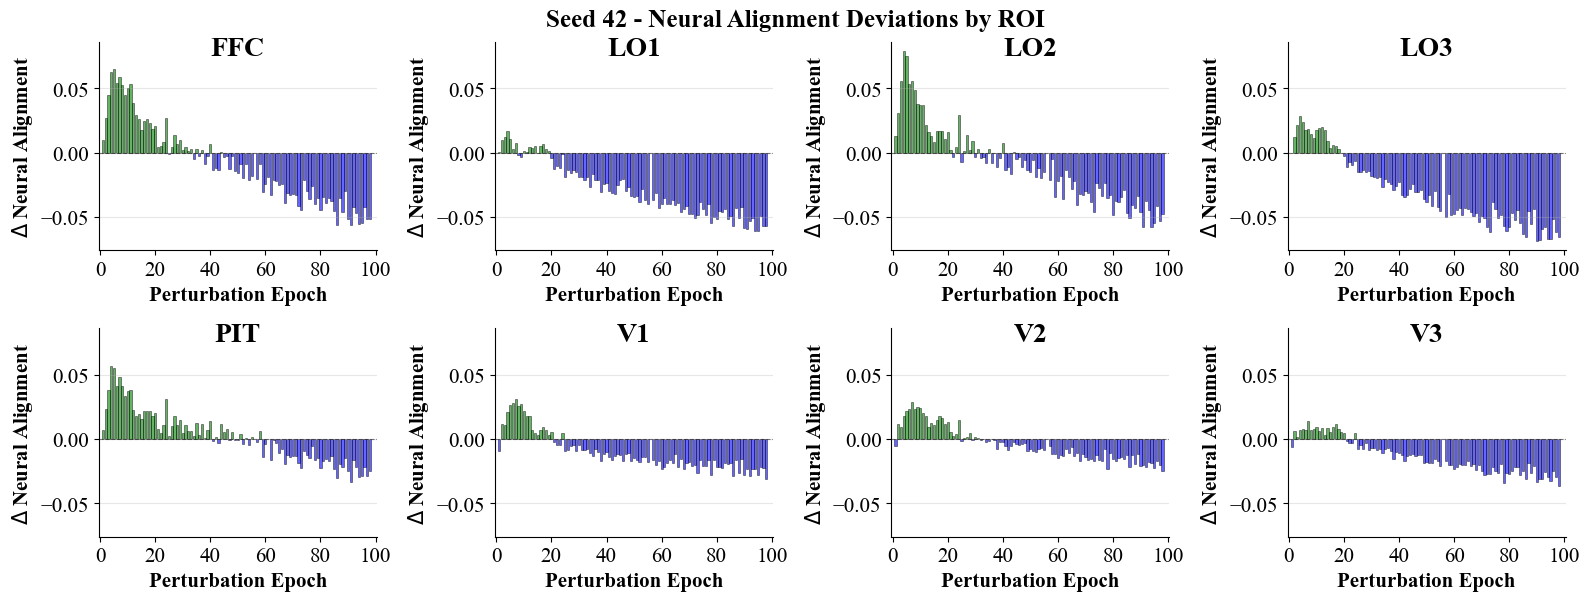

In [35]:
# Extract data at the perturbation epoch for each training run and ROI

# Define ROIs to exclude from the plots
excluded_rois = {'V4', 'V8', 'VMV1', 'VMV2', 'VMV3', 'VVC'}

# Get unique ROIs and training runs, EXCLUDING the ones in excluded_rois
unique_rois = sorted([roi for roi in merged_neural_results_seed42['roi'].unique() if roi not in excluded_rois])
unique_training_runs = sorted(merged_neural_results_seed42['training_run'].unique())

# --- First, gather all deviations for all ROIs to find the global min and max ---
all_deviations = []

roi_deviation_data_dict = {}

for roi in unique_rois:
    deviation_data = []
    for train_run in unique_training_runs:
        # Filter to this ROI, training run, and the epoch at which it was perturbed
        run_data = merged_neural_results_seed42[
            (merged_neural_results_seed42['roi'] == roi) &
            (merged_neural_results_seed42['training_run'] == train_run) &
            (merged_neural_results_seed42['epoch'] == train_run)
        ]

        if len(run_data) > 0:
            row = run_data.iloc[0]
            deviation = row['single_epoch_sweep_rho'] - row['baseline_rho']
            deviation_data.append({
                'perturbation_epoch': train_run,
                'neural_alignment_deviation': deviation
            })
            all_deviations.append(deviation)
    roi_deviation_data_dict[roi] = deviation_data

if all_deviations:
    global_ymin = min(all_deviations)
    global_ymax = max(all_deviations)
    # Add small padding for clarity
    ypad = 0.05 * (global_ymax - global_ymin) if (global_ymax - global_ymin) != 0 else 0.05
    global_ymin -= ypad
    global_ymax += ypad
else:
    global_ymin, global_ymax = -1, 1

# Calculate number of rows and columns for subplots
n_rois = len(unique_rois)
n_cols = 4  # You can adjust this
n_rows = (n_rois + n_cols - 1) // n_cols  # Ceiling division

# Define standard x-ticks for all axes
x_tick_labels = [0, 20, 40, 60, 80, 100]

# Create subplots
# Reduce height factor to make each subplot slightly shorter than before.
fig_height_per_row = 3.0  # Was 4, now 3 for shorter subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, fig_height_per_row * n_rows))
axes_flat = axes.flatten()

# Process each ROI
for roi_idx, roi in enumerate(unique_rois):
    ax = axes_flat[roi_idx]
    deviation_data = roi_deviation_data_dict[roi]
    if len(deviation_data) > 0:
        deviation_df = pd.DataFrame(deviation_data).sort_values('perturbation_epoch')

        # Bar plot for this ROI with color depending on sign of deviation
        bar_colors = ['green' if val > 0 else 'blue' for val in deviation_df['neural_alignment_deviation']]
        ax.bar(
            deviation_df['perturbation_epoch'],
            deviation_df['neural_alignment_deviation'],
            color=bar_colors,
            linewidth=0.5,
            edgecolor='black',
            alpha=0.6
        )

        # Add horizontal line at y=0
        ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)

        ax.set_xlabel('Perturbation Epoch', fontweight='bold', fontsize=15)
        ax.set_ylabel('$\Delta$ Neural Alignment', fontweight='bold', fontsize=15)
        # Move subplot title down: y=1.01 just below the top of the y-axis
        ax.set_title(f'{roi}', fontweight='bold', fontsize=20, y=0.9)
        ax.grid(axis='y', alpha=0.3)

        # Set x-axis from 0 to 100 with ticks at [0, 20, 40, 60, 80, 100]
        ax.set_xlim(-0.5, 100.5)
        ax.set_xticks(x_tick_labels)
        ax.set_xticklabels([str(x) for x in x_tick_labels], fontsize=7)

        # Increase tick label sizes for both x and y axes
        ax.tick_params(axis='x', labelsize=15)
        ax.tick_params(axis='y', labelsize=15)  

        # Set the y-axis to be the same across all subplots
        ax.set_ylim(global_ymin, global_ymax)

        # Remove top and right spines
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    else:
        # No data for this ROI
        ax.text(0.5, 0.5, f'No data for {roi}',
                transform=ax.transAxes, ha='center', va='center')
        # Move subplot title down: y=1.01 just below the top of the y-axis
        ax.set_title(f'ROI: {roi}', fontweight='bold', fontsize=20, y=1.01)
        ax.set_ylim(global_ymin, global_ymax)
        ax.set_xlim(-0.5, 100.5)
        ax.set_xticks(x_tick_labels)
        ax.set_xticklabels([str(x) for x in x_tick_labels], fontsize=7)

# Hide unused subplots
for roi_idx in range(n_rois, len(axes_flat)):
    axes_flat[roi_idx].set_visible(False)

plt.suptitle(f'Seed 42 - Neural Alignment Deviations by ROI', fontweight='bold', fontsize=18, y=0.995)
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

## Perturbation length experiments behavioral results

In [ ]:
# load the baseline results
# read in baseline data
baseline_csv = Path('../Data/checkpoints/baseline_checkpoints/clip_hba_behavior_seed1/training_results/training_res_seed1.csv')

if baseline_csv.exists():
    baseline_df = pd.read_csv(baseline_csv)
    print(f"Baseline data loaded: {len(baseline_df)} epochs")
else:
    print("Warning: Baseline data not found")

In [43]:
# Find the epoch with minimum test loss
baseline_min_test_loss_idx = baseline_df['test_loss'].idxmin()

# Keep all rows up to and including the minimum test loss epoch
baseline_filtered_df = baseline_df.loc[:baseline_min_test_loss_idx].copy()

# replace the baseline data in all_data with the baseline_filtered_df
baseline_df = baseline_filtered_df

print(baseline_df)

TypeError: string indices must be integers, not 'str'

In [ ]:
# get all of the training run results from the perturbation length experiments

# path to base directory of the perturbation length experiments
perturb_length_base_dir = Path('clip_hba_behavior/Data/checkpoints/noisy_target_checkpoints/perturbation_differing_lengths/perturb_length_experiments_baselineseed1_perturbseed0')

# list all training run directories in the results_dir
run_dirs = sorted([d for d in perturb_length_base_dir.iterdir() 
                  if d.is_dir()
                  and d.name.startswith('random_target')])

for run_dir in run_dirs:
    print(run_dir.name)

random_target_e10_l10
random_target_e10_l2
random_target_e10_l20
random_target_e10_l30
random_target_e10_l40
random_target_e10_l5
random_target_e10_l50
random_target_e13_l10
random_target_e13_l20
random_target_e13_l30
random_target_e13_l40
random_target_e13_l5
random_target_e13_l50
random_target_e16_l10
random_target_e16_l20
random_target_e16_l30
random_target_e16_l40
random_target_e16_l5
random_target_e16_l50
random_target_e19_l10
random_target_e19_l20
random_target_e19_l30
random_target_e19_l40
random_target_e19_l5
random_target_e19_l50
random_target_e1_l10
random_target_e1_l2
random_target_e1_l20
random_target_e1_l30
random_target_e1_l40
random_target_e1_l5
random_target_e1_l50
random_target_e22_l5
random_target_e2_l10
random_target_e2_l2
random_target_e2_l20
random_target_e2_l30
random_target_e2_l40
random_target_e2_l5
random_target_e2_l50
random_target_e3_l10
random_target_e3_l2
random_target_e3_l20
random_target_e3_l30
random_target_e3_l40
random_target_e3_l5
random_target_e3_l50

In [ ]:
# in every run_dir, find the folder called either metrics.csv or training_res.csv
# and read it in as a pandas dataframe

#all_perturb_length_dfs should be a dict mapping run names (strings) to DataFrames, or a list of DataFrames, where each DataFrame has a 'test_loss' column and its indices represent epochs. 

all_perturb_length_dfs = {}

for run_dir in run_dirs:
    if 'metrics.csv' in os.listdir(run_dir):
        print(f'Found results csv in {run_dir.name}')
        df = pd.read_csv(run_dir / 'metrics.csv')
        all_perturb_length_dfs[run_dir.name] = df
    elif 'training_res.csv' in os.listdir(run_dir):
        print(f'Found results csv in {run_dir.name}')
        df = pd.read_csv(run_dir / 'training_res.csv')
        all_perturb_length_dfs[run_dir.name] = df

Found results csv in random_target_e10_l10
Found results csv in random_target_e10_l2
Found results csv in random_target_e10_l20
Found results csv in random_target_e10_l30
Found results csv in random_target_e10_l40
Found results csv in random_target_e10_l5
Found results csv in random_target_e10_l50
Found results csv in random_target_e13_l10
Found results csv in random_target_e13_l20
Found results csv in random_target_e13_l30
Found results csv in random_target_e13_l40
Found results csv in random_target_e13_l5
Found results csv in random_target_e13_l50
Found results csv in random_target_e16_l10
Found results csv in random_target_e16_l20
Found results csv in random_target_e16_l30
Found results csv in random_target_e16_l40
Found results csv in random_target_e16_l5
Found results csv in random_target_e16_l50
Found results csv in random_target_e19_l10
Found results csv in random_target_e19_l20
Found results csv in random_target_e19_l30
Found results csv in random_target_e19_l40
Found results c

Found results csv in random_target_e2_l2
Found results csv in random_target_e2_l20
Found results csv in random_target_e2_l30
Found results csv in random_target_e2_l40
Found results csv in random_target_e2_l5
Found results csv in random_target_e2_l50
Found results csv in random_target_e3_l10
Found results csv in random_target_e3_l2
Found results csv in random_target_e3_l20
Found results csv in random_target_e3_l30
Found results csv in random_target_e3_l40
Found results csv in random_target_e3_l5
Found results csv in random_target_e3_l50
Found results csv in random_target_e40_l10
Found results csv in random_target_e40_l2
Found results csv in random_target_e40_l20
Found results csv in random_target_e40_l30
Found results csv in random_target_e40_l40
Found results csv in random_target_e40_l5
Found results csv in random_target_e40_l50
Found results csv in random_target_e58_l10
Found results csv in random_target_e58_l20
Found results csv in random_target_e58_l30
Found results csv in random_ta

In [ ]:
print(all_perturb_length_dfs)

{'random_target_e10_l10':      epoch  train_loss  test_loss  behavioral_rsa_rho  behavioral_rsa_p_value  \
0       10  116.037356  83.877477            0.627783           1.161130e-124   
1       11  108.866402  87.170436            0.620361           6.029206e-121   
2       12  106.712804  90.209957            0.620820           3.575812e-121   
3       13  105.615242  92.952512            0.619597           1.434417e-120   
4       14  104.945687  95.128610            0.619060           2.637457e-120   
..     ...         ...        ...                 ...                     ...   
104    114   14.820902  29.497532            0.730804           5.946660e-189   
105    115   14.732647  29.561627            0.734103           1.669248e-191   
106    116   14.660842  29.512901            0.734373           1.028537e-191   
107    117   14.560640  29.578890            0.734255           1.272555e-191   
108    118   14.474779  29.601395            0.732563           2.619055e-190   

 

In [ ]:

# combine this with the baseline df, merging on the epoch column, then select 'epoch', and any columns containing 'test_loss' in their names
special_df = pd.merge(baseline_df, all_perturb_length_dfs['random_target_e1_l10'], on='epoch', how='outer')[['epoch', 'test_loss_x', 'test_loss_y']]

print(special_df.to_string())


     epoch  test_loss_x  test_loss_y
0        1   114.267337   119.604526
1        2    91.310430    96.775429
2        3    84.871568    94.975433
3        4    80.375895    94.335770
4        5    76.447118    93.972163
5        6    73.568759    94.914375
6        7    71.198615    97.326795
7        8    68.586059    98.607863
8        9    65.068034    99.358473
9       10    60.307024    99.739522
10      11    56.113487    88.394170
11      12    52.844717    80.833261
12      13    50.444933    76.297111
13      14    48.648318    70.509161
14      15    47.024271    61.654141
15      16    45.653933    52.840882
16      17    44.318907    48.203231
17      18    43.059134    45.092564
18      19    42.113390    43.049189
19      20    41.175045    41.457544
20      21    40.246910    40.045311
21      22    39.534341    39.082488
22      23    38.785147    38.157802
23      24    38.125127    37.309418
24      25    37.566435    36.695788
25      26    36.954318    36.103118
2

In [ ]:
# filter out the rows that were from before early stopping kicked in (but after the minimum test loss was achieved)

all_perturb_length_data = {}

for run_name, df in all_perturb_length_dfs.items():
    if len(df) == 0:
        all_perturb_length_data[run_name] = df
        continue

    # Find the epoch with minimum test loss
    min_test_loss_idx = df['test_loss'].idxmin()

    # Keep all rows up to and including the minimum test loss epoch
    filtered_df = df.loc[:min_test_loss_idx].copy()

    all_perturb_length_data[run_name] = filtered_df

    # Print info about the filtering
    original_epochs = len(df)
    filtered_epochs = len(filtered_df)
    removed_epochs = original_epochs - filtered_epochs
    print(f"{run_name}: {original_epochs} -> {filtered_epochs} epochs "
            f"(removed {removed_epochs} epochs after minimum test loss)")

random_target_e10_l10: 109 -> 89 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l2: 95 -> 75 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l20: 109 -> 89 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l30: 119 -> 99 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l40: 127 -> 107 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l5: 97 -> 77 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l50: 136 -> 116 epochs (removed 20 epochs after minimum test loss)
random_target_e13_l10: 106 -> 86 epochs (removed 20 epochs after minimum test loss)
random_target_e13_l20: 106 -> 86 epochs (removed 20 epochs after minimum test loss)
random_target_e13_l30: 124 -> 104 epochs (removed 20 epochs after minimum test loss)
random_target_e13_l40: 124 -> 104 epochs (removed 20 epochs after minimum test loss)
random_target_e13_l5: 106 -> 86 epochs (removed 20 epochs after minimum test

In [ ]:


# First, let's examine the actual run names to understand the format
print("Actual run names:")
for run_name, df in all_perturb_length_dfs.items():
    print(f"  {run_name}")

print("\nParsing run names...")

# Extract metadata for each run
run_metadata = []
for run_name, df in all_perturb_length_dfs.items():
    # Parse run name - format appears to be "random_target_e{epoch}_l{length}"
    # Let's handle this more carefully
    if 'random_target_e' in run_name:
        # Extract epoch and length from format like "random_target_e70_l20"
        parts = run_name.split('_')
        start_epoch = None
        length = None
        
        for part in parts:
            if part.startswith('e') and part[1:].isdigit():
                start_epoch = int(part[1:])
            elif part.startswith('l') and part[1:].isdigit():
                length = int(part[1:])
        
        if start_epoch is not None and length is not None:
            run_metadata.append({
                'run_name': run_name,
                'start_epoch': start_epoch,
                'length': length,
                'df': df
            })
            
            print(f"Run: {run_name}")
            print(f"  Start epoch: {start_epoch}")
            print(f"  Length: {length} epochs")
            print(f"  Total epochs: {len(df)}")
            print()
        else:
            print(f"Warning: Could not parse run name: {run_name}")
    else:
        print(f"Warning: Unexpected run name format: {run_name}")

print(f"Total runs parsed: {len(run_metadata)}")


Actual run names:
  random_target_e10_l10
  random_target_e10_l2
  random_target_e10_l20
  random_target_e10_l30
  random_target_e10_l40
  random_target_e10_l5
  random_target_e10_l50
  random_target_e13_l10
  random_target_e13_l20
  random_target_e13_l30
  random_target_e13_l40
  random_target_e13_l5
  random_target_e13_l50
  random_target_e16_l10
  random_target_e16_l20
  random_target_e16_l30
  random_target_e16_l40
  random_target_e16_l5
  random_target_e16_l50
  random_target_e19_l10
  random_target_e19_l20
  random_target_e19_l30
  random_target_e19_l40
  random_target_e19_l5
  random_target_e19_l50
  random_target_e1_l10
  random_target_e1_l2
  random_target_e1_l20
  random_target_e1_l30
  random_target_e1_l40
  random_target_e1_l5
  random_target_e1_l50
  random_target_e22_l5
  random_target_e2_l10
  random_target_e2_l2
  random_target_e2_l20
  random_target_e2_l30
  random_target_e2_l40
  random_target_e2_l5
  random_target_e2_l50
  random_target_e3_l10
  random_target_e3_l2
 

In [ ]:
# Calculate recovery times for behavioral alignment within 1% of baseline
recovery_data = []

for run_info in run_metadata:
    run_name = run_info['run_name']
    start_epoch = run_info['start_epoch']
    length = run_info['length']
    df = run_info['df']
    
    # Sort the run data by epoch
    df_sorted = df.sort_values('epoch')
    
    # Calculate when perturbation ends
    perturbation_end = start_epoch + length - 1
    
    # Only check for recovery AFTER the perturbation period has ended
    # Filter data to only include epochs after perturbation
    post_perturbation_data = df_sorted[df_sorted['epoch'] > perturbation_end]
    
    if len(post_perturbation_data) == 0:
        # If no data after perturbation, mark as not recovered
        recovery_data.append({
            'run_name': run_name,
            'start_epoch': start_epoch,
            'length': length,
            'perturbation_end': perturbation_end,
            'recovery_epoch': None,
            'epochs_to_recovery': None
        })
        continue
    
    # Find the first epoch AFTER perturbation where behavioral_rsa_rho is within 1% of baseline
    recovery_epoch = None
    
    for _, row in post_perturbation_data.iterrows():
        current_epoch = int(row['epoch'])
        
        # Get baseline behavioral alignment at the same epoch
        baseline_at_same_epoch = baseline_df[baseline_df['epoch'] == current_epoch]
        
        if len(baseline_at_same_epoch) > 0:
            baseline_ba = baseline_at_same_epoch.iloc[0]['behavioral_rsa_rho']
            # For behavioral alignment, we want to be within 1% of baseline
            # Since higher is better, we check if run_ba >= baseline_ba * 0.99
            target_ba = baseline_ba * 0.99  # Within 1% of baseline (1% lower)
            
            if row['behavioral_rsa_rho'] >= target_ba:
                recovery_epoch = current_epoch
                break
    
    if recovery_epoch is not None:
        # Calculate epochs from end of perturbation to recovery
        epochs_to_recovery = recovery_epoch - perturbation_end
        recovery_data.append({
            'run_name': run_name,
            'start_epoch': start_epoch,
            'length': length,
            'perturbation_end': perturbation_end,
            'recovery_epoch': recovery_epoch,
            'epochs_to_recovery': epochs_to_recovery
        })
    else:
        # If never recovered after perturbation, mark as not recovered
        recovery_data.append({
            'run_name': run_name,
            'start_epoch': start_epoch,
            'length': length,
            'perturbation_end': perturbation_end,
            'recovery_epoch': None,
            'epochs_to_recovery': None
        })

# Print recovery results
print("Recovery Analysis Results:")
print("="*60)
for data in recovery_data:
    print(f"Run: {data['run_name']}")
    print(f"  Perturbation: Epoch {data['start_epoch']} to {data['perturbation_end']} (length: {data['length']})")
    if data['recovery_epoch'] is not None:
        print(f"  Recovery: Epoch {data['recovery_epoch']} ({data['epochs_to_recovery']} epochs after perturbation)")
    else:
        print(f"  Recovery: Never recovered within 1% of baseline after perturbation")
    print()


Recovery Analysis Results:
Run: random_target_e10_l10
  Perturbation: Epoch 10 to 19 (length: 10)
  Recovery: Epoch 37 (18 epochs after perturbation)

Run: random_target_e10_l2
  Perturbation: Epoch 10 to 11 (length: 2)
  Recovery: Epoch 17 (6 epochs after perturbation)

Run: random_target_e10_l20
  Perturbation: Epoch 10 to 29 (length: 20)
  Recovery: Epoch 52 (23 epochs after perturbation)

Run: random_target_e10_l30
  Perturbation: Epoch 10 to 39 (length: 30)
  Recovery: Epoch 59 (20 epochs after perturbation)

Run: random_target_e10_l40
  Perturbation: Epoch 10 to 49 (length: 40)
  Recovery: Epoch 65 (16 epochs after perturbation)

Run: random_target_e10_l5
  Perturbation: Epoch 10 to 14 (length: 5)
  Recovery: Epoch 23 (9 epochs after perturbation)

Run: random_target_e10_l50
  Perturbation: Epoch 10 to 59 (length: 50)
  Recovery: Epoch 73 (14 epochs after perturbation)

Run: random_target_e13_l10
  Perturbation: Epoch 13 to 22 (length: 10)
  Recovery: Epoch 41 (19 epochs after pe

In [ ]:
# Calculate recovery times for test loss within 1% of baseline after perturbations finish
recovery_data = []

for run_info in run_metadata:
    run_name = run_info['run_name']
    df = run_info['df']
    start_epoch = run_info['start_epoch']
    length = run_info['length']
    
    # Calculate when perturbation ends
    perturbation_end = start_epoch + length - 1
    
    # Sort the run data by epoch
    df_sorted = df.sort_values('epoch')
    
    # Find the first epoch AFTER perturbation ends where test_loss is within 1% of baseline
    recovery_epoch = None
    
    for _, row in df_sorted.iterrows():
        current_epoch = int(row['epoch'])
        # Only check epochs after perturbation has ended
        if current_epoch <= perturbation_end:
            continue
        # Get baseline loss at the same epoch
        baseline_at_same_epoch = baseline_df[baseline_df['epoch'] == current_epoch]
        if len(baseline_at_same_epoch) > 0:
            baseline_loss = baseline_at_same_epoch.iloc[0]['test_loss']
            target_loss = baseline_loss * 1.01  # Within 1% of baseline at same epoch
            if row['test_loss'] <= target_loss:
                recovery_epoch = current_epoch
                break
        else:
            # compare to the minimum test loss epoch
            baseline_loss = baseline_df['test_loss'].min()
            target_loss = baseline_loss * 1.01
            if row['test_loss'] <= target_loss:
                recovery_epoch = current_epoch
                break
        
    if recovery_epoch is not None:
        epochs_to_recovery = recovery_epoch - perturbation_end
        recovery_data.append({
            'run_name': run_name,
            'start_epoch': start_epoch,
            'length': length,
            'perturbation_end': perturbation_end,
            'recovery_epoch': recovery_epoch,
            'epochs_to_recovery': epochs_to_recovery,
            'label': f'E{start_epoch}_L{length}',
            'recovered': True
        })
    else:
        #max_epoch_in_run = df_sorted['epoch'].max()
        #epochs_after_perturbation = max_epoch_in_run - perturbation_end
        epochs_to_recovery = None
        recovery_data.append({
            'run_name': run_name,
            'start_epoch': start_epoch,
            'length': length,
            'perturbation_end': perturbation_end,
            'recovery_epoch': None,
            'epochs_to_recovery': None,
            'label': f'E{start_epoch}_L{length}',
            'recovered': False
        })

# Convert to DataFrame for easier manipulation
recovery_df = pd.DataFrame(recovery_data)

# Sort by start_epoch, then by length for better visualization
recovery_df = recovery_df.sort_values(['start_epoch', 'length'])

print(recovery_df)


                  run_name  start_epoch  length  perturbation_end  \
26     random_target_e1_l2            1       2                 2   
30     random_target_e1_l5            1       5                 5   
25    random_target_e1_l10            1      10                10   
27    random_target_e1_l20            1      20                20   
28    random_target_e1_l30            1      30                30   
..                     ...          ...     ...               ...   
103  random_target_e94_l10           94      10               103   
104  random_target_e94_l20           94      20               113   
105  random_target_e94_l30           94      30               123   
106  random_target_e94_l40           94      40               133   
108  random_target_e94_l50           94      50               143   

     recovery_epoch  epochs_to_recovery    label  recovered  
26             43.0                41.0    E1_L2       True  
30             58.0                53.0    E1_L

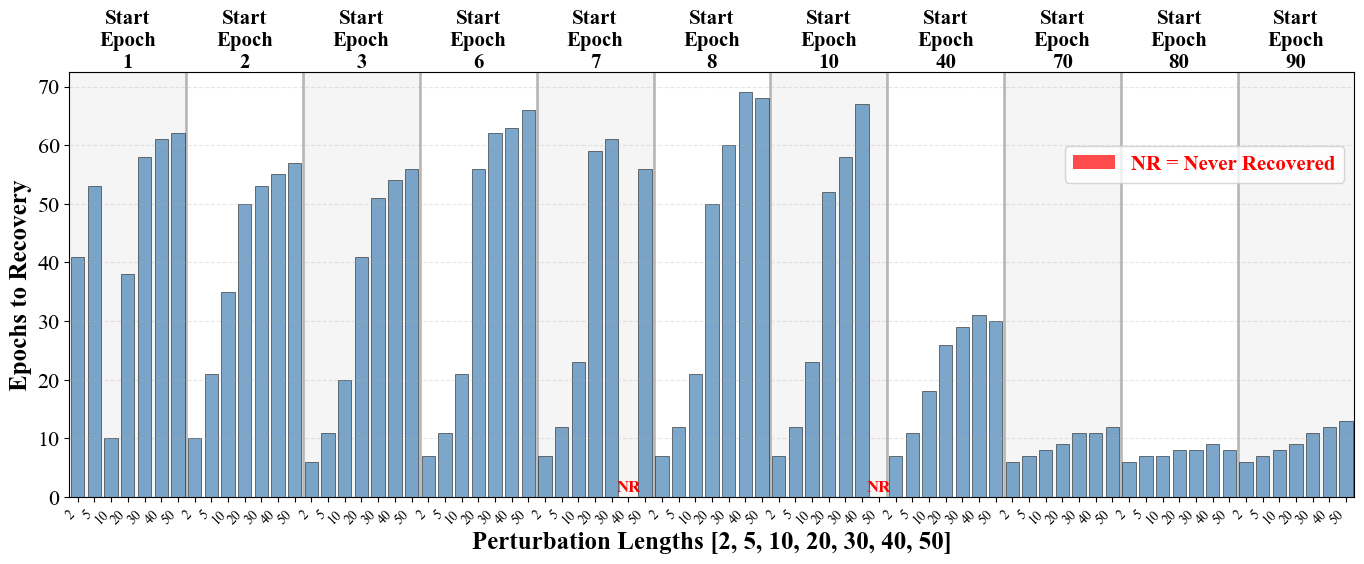


Recovery time statistics (epochs to within 1% of baseline after perturbation ends):
  Total runs analyzed: 109
  Runs that recovered: 103
  Runs that never recovered: 6
  Mean recovery time (recovered runs): 28.8 epochs
  Standard deviation: 22.0 epochs
  Minimum recovery time: 6 epochs
  Maximum recovery time (recovered): 71 epochs

Never recovered runs:
  E7_L40: nan epochs after perturbation (still not recovered)
  E10_L50: nan epochs after perturbation (still not recovered)
  E13_L30: nan epochs after perturbation (still not recovered)
  E13_L40: nan epochs after perturbation (still not recovered)
  E13_L50: nan epochs after perturbation (still not recovered)
  E16_L50: nan epochs after perturbation (still not recovered)


In [ ]:

# Separate recovered and never-recovered runs
recovered_runs = recovery_df[recovery_df['recovered'] == True].copy()
never_recovered_runs = recovery_df[recovery_df['recovered'] == False].copy()

import matplotlib as mpl
from matplotlib.patches import Patch

# Exclude any rows you want to exclude
recovery_df = recovery_df[recovery_df['start_epoch'] != 13]
recovery_df = recovery_df[recovery_df['start_epoch'] != 16]
recovery_df = recovery_df[recovery_df['start_epoch'] != 19]
recovery_df = recovery_df[recovery_df['start_epoch'] != 22]
recovery_df = recovery_df[recovery_df['start_epoch'] != 60]
recovery_df = recovery_df[recovery_df['start_epoch'] != 58]
recovery_df = recovery_df[recovery_df['start_epoch'] != 94]

# Set width statically to 10 inches
plt.figure(figsize=(14, 6))

# Group by start_epoch for section delineation
x_positions = []
y_values = []
colors = []
x_labels = []
section_boundaries = []
section_centers = []
section_label_map = {}
curr_x = 0
recovery_rows = []

unique_epochs = sorted(recovery_df['start_epoch'].unique())

# Build plot arrays and calculate boundaries
for start_epoch in unique_epochs:
    section_data = recovery_df[recovery_df['start_epoch'] == start_epoch]
    section_start = curr_x  # inclusive bar
    for _, row in section_data.iterrows():
        x_positions.append(curr_x)
        # For never-recovered runs, set y to 0 so the bar is invisible
        if row['recovered']:
            y_values.append(row['epochs_to_recovery'])
        else:
            y_values.append(0)
        colors.append('steelblue' if row['recovered'] else 'red')
        x_labels.append(f"{row['length']}")
        recovery_rows.append(row)
        curr_x += 1
    section_end = curr_x - 1  # inclusive bar
    section_boundaries.append((section_start - 0.5, section_end + 0.5))
    section_centers.append((section_start + section_end) / 2)
    section_label_map[start_epoch] = (section_start, section_end)

bars = plt.bar(x_positions, y_values, alpha=0.7, color=colors, edgecolor='black', linewidth=0.5)

# Add "NR" annotation *at the bar position* for not recovered
for i, row in enumerate(recovery_rows):
    if not row['recovered']:
        # Place the "NR" right above zero, or slightly above the bar bottom
        plt.text(x_positions[i], 0.3, 'NR', ha='center', va='bottom', 
                 fontsize=12, fontweight='bold', color='red', zorder=10, clip_on=False)

plt.xlabel('Perturbation Lengths [2, 5, 10, 20, 30, 40, 50]', fontsize=18, fontweight='bold')
plt.ylabel('Epochs to Recovery', fontsize=18, fontweight='bold')

# Make y-axis tick labels larger
plt.yticks(fontsize=16)

# Section annotation: add a "Start Epoch {start_epoch}" label above each group only at the group's x center, but below the top border
ymax = plt.ylim()[1]
# Place label a fixed distance below the top
offset = 0 * ymax  # You can adjust this if desired (e.g. 0.02 or 0.05)
label_y = ymax - offset
for center, start_epoch in zip(section_centers, unique_epochs):
    plt.text(center, label_y, f"Start\nEpoch\n{start_epoch}", ha='center', va='bottom',
             fontsize=15, fontweight='bold', color='black', clip_on=False)

plt.ylim(top=ymax)  # Set top limit to origin ymax (no margin needed for label)

# Draw vertical lines between different start_epoch sections (except after the last)
for i in range(1, len(section_centers)):
    right = section_boundaries[i][0]  # position between bars
    plt.axvline(right, color='gray', linestyle='-', lw=2, alpha=0.5, zorder=0)

# Add background shading for every other section
for i, (section_start, section_end) in enumerate(section_boundaries):
    if i % 2 == 0:
        plt.axvspan(section_start, section_end, color='gray', alpha=0.08, zorder=0)

plt.xticks(x_positions, x_labels, rotation=45, ha='right', fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--', axis='y')

# Remove x-axis padding to left and right
if x_positions:
    plt.xlim(left=min(x_positions) - 0.5, right=max(x_positions) + 0.5)

# Create legend with red, bold text
legend_elements = [
    Patch(facecolor='red', alpha=0.7, label='NR = Never Recovered')
]
plt.legend(
    handles=legend_elements,
    fontsize=13,
    loc='upper right',
    bbox_to_anchor=(1, 0.85),
    labelcolor='red',
    prop={'weight': 'bold',
          'size': 15}
)

plt.tight_layout(pad=2)
plt.show()

# Print summary statistics
print(f"\nRecovery time statistics (epochs to within 1% of baseline after perturbation ends):")
print(f"  Total runs analyzed: {len(recovery_data)}")
print(f"  Runs that recovered: {len(recovered_runs)}")
print(f"  Runs that never recovered: {len(never_recovered_runs)}")
if len(recovered_runs) > 0:
    mean_recovery = recovered_runs['epochs_to_recovery'].mean()
    std_recovery = recovered_runs['epochs_to_recovery'].std()
    min_recovery = recovered_runs['epochs_to_recovery'].min()
    max_recovery = recovered_runs['epochs_to_recovery'].max()
    print(f"  Mean recovery time (recovered runs): {mean_recovery:.1f} epochs")
    print(f"  Standard deviation: {std_recovery:.1f} epochs")
    print(f"  Minimum recovery time: {min_recovery:.0f} epochs")
    print(f"  Maximum recovery time (recovered): {max_recovery:.0f} epochs")
    
print(f"\nNever recovered runs:")
for _, row in never_recovered_runs.iterrows():
    print(f"  {row['label']}: {row['epochs_to_recovery']:.0f} epochs after perturbation (still not recovered)")


Summary Statistics:
  Baseline maximum BA (epoch 53): 0.7790
  Total runs: 77
  Mean deviation: -0.0065
  Standard deviation: 0.0060
  Min deviation: -0.0200
  Max deviation: 0.0064
  Runs better than baseline maximum: 9
  Runs worse than baseline maximum: 68


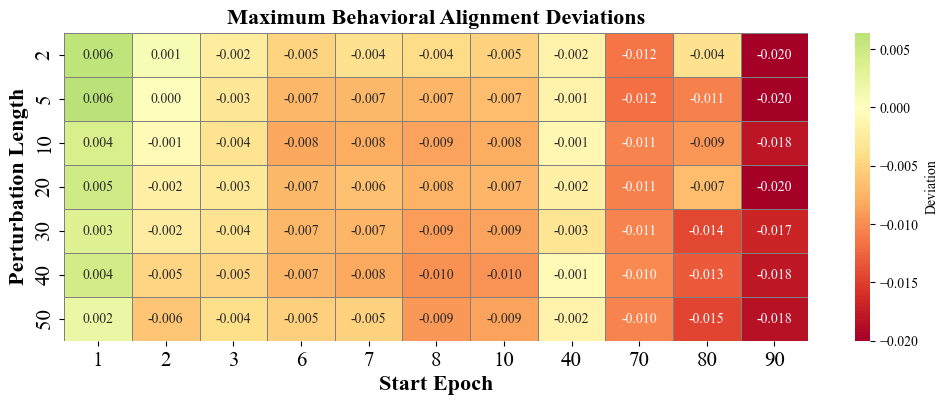

In [ ]:
# show the deviation of the best experiment behavioral alignment from best baseline behavioral alignment in a heatmap, with starting epoch on the x-axis and perturbation length on the y-axis
# the color of the cell shows the deviation from baseline behavioral alignment
# the heatmap is sorted by starting epoch on the x-axis, then by perturbation length on the y-axis

import seaborn as sns

# Get maximum behavioral alignment from baseline run
baseline_max_ba = baseline_df['behavioral_rsa_rho'].max()
baseline_max_epoch = baseline_df.loc[baseline_df['behavioral_rsa_rho'].idxmax(), 'epoch']

# Collect maximum behavioral alignment deviations
deviation_data = []

for run_info in run_metadata:
    run_name = run_info['run_name']
    df = run_info['df']
    start_epoch = run_info['start_epoch']
    length = run_info['length']
    
    # Sort by epoch
    df_sorted = df.sort_values('epoch')
    
    if len(df_sorted) == 0:
        continue
    
    # Get maximum behavioral alignment value reached in this run
    max_ba = df_sorted['behavioral_rsa_rho'].max()
    max_ba_epoch = df_sorted.loc[df_sorted['behavioral_rsa_rho'].idxmax(), 'epoch']
    
    # Calculate deviation from baseline maximum
    # (positive = better than baseline, negative = worse)
    deviation = max_ba - baseline_max_ba

    deviation_data.append({
        'start_epoch': start_epoch,
        'length': length,
        'deviation': deviation,
        'max_ba': max_ba,
        'max_ba_epoch': max_ba_epoch,
        'baseline_max_ba': baseline_max_ba
    })

# Convert to DataFrame
deviation_df = pd.DataFrame(deviation_data)

# Exclude any rows you want to exclude
deviation_df = deviation_df[deviation_df['start_epoch'] != 13]
deviation_df = deviation_df[deviation_df['start_epoch'] != 16]
deviation_df = deviation_df[deviation_df['start_epoch'] != 19]
deviation_df = deviation_df[deviation_df['start_epoch'] != 22]
deviation_df = deviation_df[deviation_df['start_epoch'] != 60]
deviation_df = deviation_df[deviation_df['start_epoch'] != 58]
deviation_df = deviation_df[deviation_df['start_epoch'] != 94]



# Create pivot table for heatmap: rows (y-axis) = length, columns (x-axis) = start_epoch
heatmap_data = deviation_df.pivot_table(
    values='deviation',
    index='length',
    columns='start_epoch',
    aggfunc='first'  # Should only be one value per combination, but use first to be safe
)

# Sort by start_epoch (columns) and length (rows)
heatmap_data = heatmap_data.sort_index(axis=0)  # Sort rows (length)
heatmap_data = heatmap_data.sort_index(axis=1)  # Sort columns (start_epoch)

# Create the heatmap with smaller figure size
plt.figure(figsize=(12, 4))
ax = sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt='.3f', 
    cmap='RdYlGn',  # Red-Yellow-Green colormap (red=worse, green=better)
    center=0,  # Center colormap at 0 (no deviation)
    cbar_kws={'label': 'Deviation'},
    linewidths=0.5,
    linecolor='gray'
)
ax.set_xlabel('Start Epoch', fontsize=16, fontweight='bold')
ax.set_ylabel('Perturbation Length', fontsize=16, fontweight='bold')
ax.set_title('Maximum Behavioral Alignment Deviations', fontsize=16, fontweight='bold')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Print summary statistics
print(f"\nSummary Statistics:")
print(f"  Baseline maximum BA (epoch {baseline_max_epoch}): {baseline_max_ba:.4f}")
print(f"  Total runs: {len(deviation_df)}")
print(f"  Mean deviation: {deviation_df['deviation'].mean():.4f}")
print(f"  Standard deviation: {deviation_df['deviation'].std():.4f}")
print(f"  Min deviation: {deviation_df['deviation'].min():.4f}")
print(f"  Max deviation: {deviation_df['deviation'].max():.4f}")
print(f"  Runs better than baseline maximum: {len(deviation_df[deviation_df['deviation'] > 0])}")
print(f"  Runs worse than baseline maximum: {len(deviation_df[deviation_df['deviation'] < 0])}")


Summary Statistics:
  Baseline minimum test loss (epoch 98): 29.1013
  Total runs: 77
  Mean deviation: 0.1416
  Standard deviation: 0.0795
  Min deviation: 0.0183
  Max deviation: 0.3354
  Runs better than baseline minimum (negative deviation): 0
  Runs worse than baseline minimum (positive deviation): 77


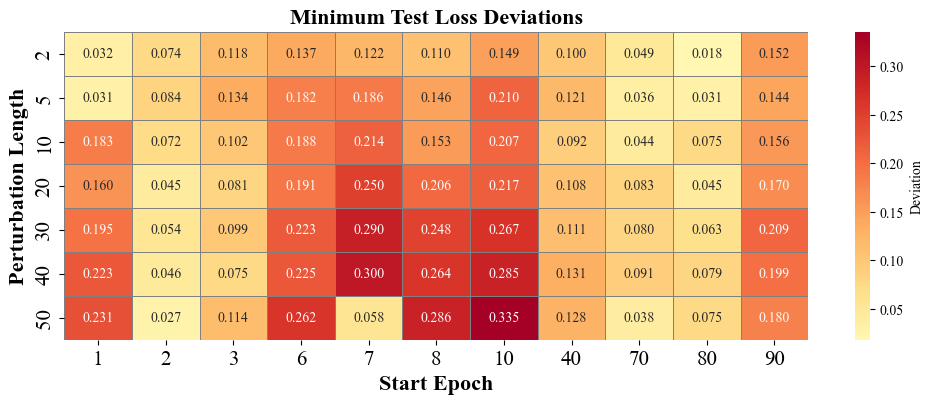

In [ ]:
# show the deviation from baseline minimum test loss in a heatmap, with starting epoch on the x-axis and perturbation length on the y-axis
# the color of the cell shows the deviation from baseline minimum test loss
# the heatmap is sorted by starting epoch on the x-axis, then by perturbation length on the y-axis

import seaborn as sns

# Get minimum test loss from baseline run
baseline_min_test_loss = baseline_df['test_loss'].min()
baseline_min_epoch = baseline_df.loc[baseline_df['test_loss'].idxmin(), 'epoch']

# Collect minimum test loss deviations
deviation_data = []

for run_info in run_metadata:
    run_name = run_info['run_name']
    df = run_info['df']
    start_epoch = run_info['start_epoch']
    length = run_info['length']
    
    # Sort by epoch
    df_sorted = df.sort_values('epoch')
    
    if len(df_sorted) == 0:
        continue
    
    # Get minimum test loss value reached in this run
    min_test_loss = df_sorted['test_loss'].min()
    min_test_loss_epoch = df_sorted.loc[df_sorted['test_loss'].idxmin(), 'epoch']
    
    # Calculate deviation from baseline minimum
    # (positive = worse than baseline, negative = better)
    deviation = min_test_loss - baseline_min_test_loss

    deviation_data.append({
        'start_epoch': start_epoch,
        'length': length,
        'deviation': deviation,
        'min_test_loss': min_test_loss,
        'min_test_loss_epoch': min_test_loss_epoch,
        'baseline_min_test_loss': baseline_min_test_loss
    })

# Convert to DataFrame
deviation_df = pd.DataFrame(deviation_data)

# Exclude any rows you want to exclude
deviation_df = deviation_df[deviation_df['start_epoch'] != 13]
deviation_df = deviation_df[deviation_df['start_epoch'] != 16]
deviation_df = deviation_df[deviation_df['start_epoch'] != 19]
deviation_df = deviation_df[deviation_df['start_epoch'] != 22]
deviation_df = deviation_df[deviation_df['start_epoch'] != 60]
deviation_df = deviation_df[deviation_df['start_epoch'] != 58]
deviation_df = deviation_df[deviation_df['start_epoch'] != 94]

# Create pivot table for heatmap: rows (y-axis) = length, columns (x-axis) = start_epoch
heatmap_data = deviation_df.pivot_table(
    values='deviation',
    index='length',
    columns='start_epoch',
    aggfunc='first'  # Should only be one value per combination, but use first to be safe
)

# Sort by start_epoch (columns) and length (rows)
heatmap_data = heatmap_data.sort_index(axis=0)  # Sort rows (length)
heatmap_data = heatmap_data.sort_index(axis=1)  # Sort columns (start_epoch)

# Create the heatmap with smaller figure size
plt.figure(figsize=(12, 4))
ax = sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt='.3f', 
    cmap='RdYlGn_r',  # Reversed Red-Yellow-Green colormap (green=better/lower, red=worse/higher)
    center=0,  # Center colormap at 0 (no deviation)
    cbar_kws={'label': 'Deviation'},
    linewidths=0.5,
    linecolor='gray'
)
ax.set_xlabel('Start Epoch', fontsize=16, fontweight='bold')
ax.set_ylabel('Perturbation Length', fontsize=16, fontweight='bold')
ax.set_title('Minimum Test Loss Deviations', fontsize=16, fontweight='bold')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Print summary statistics
print(f"\nSummary Statistics:")
print(f"  Baseline minimum test loss (epoch {baseline_min_epoch}): {baseline_min_test_loss:.4f}")
print(f"  Total runs: {len(deviation_df)}")
print(f"  Mean deviation: {deviation_df['deviation'].mean():.4f}")
print(f"  Standard deviation: {deviation_df['deviation'].std():.4f}")
print(f"  Min deviation: {deviation_df['deviation'].min():.4f}")
print(f"  Max deviation: {deviation_df['deviation'].max():.4f}")
print(f"  Runs better than baseline minimum (negative deviation): {len(deviation_df[deviation_df['deviation'] < 0])}")
print(f"  Runs worse than baseline minimum (positive deviation): {len(deviation_df[deviation_df['deviation'] > 0])}")